In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib


In [2]:
#data_frame = pd.read_csv("train.csv")
train = pd.read_csv('train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("store.csv", 
                    low_memory = False)

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

train_store

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,2013-01-05,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,2013-01-04,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,2013-01-03,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,2013-01-02,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [3]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 18, 8

In [9]:
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,5,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,4,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,3,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,2,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


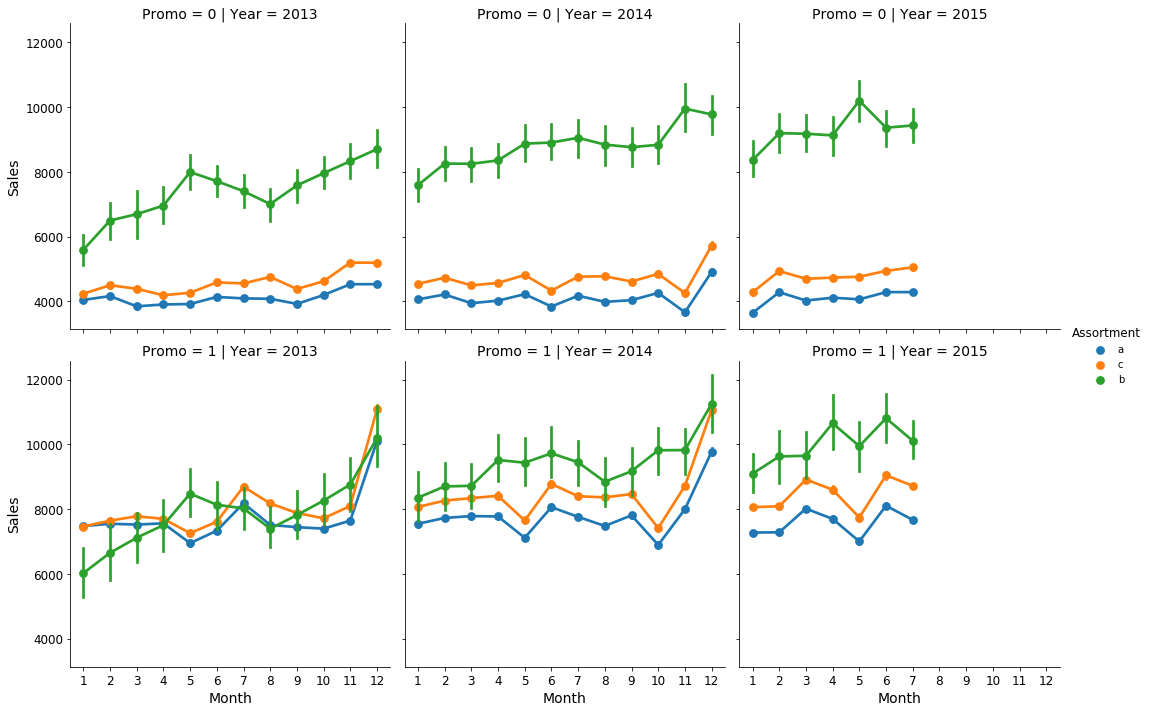

In [10]:
sns.factorplot(data = train_store, x ="Month", y = "Sales", 
               col = 'Year', # per store type in cols
               hue = 'Assortment',
               row='Promo'
              )

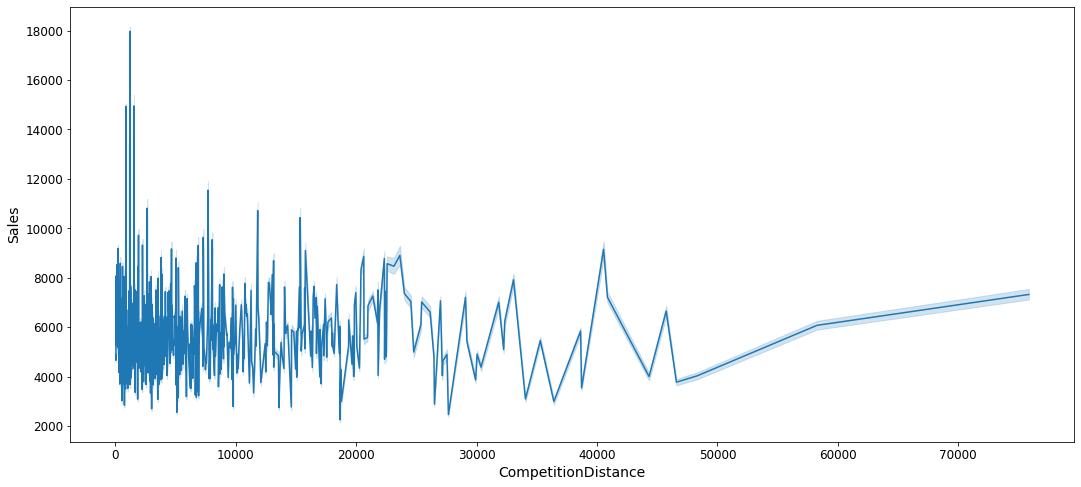

In [5]:
sns.lineplot(x="CompetitionDistance", y="Sales", data=train_store)

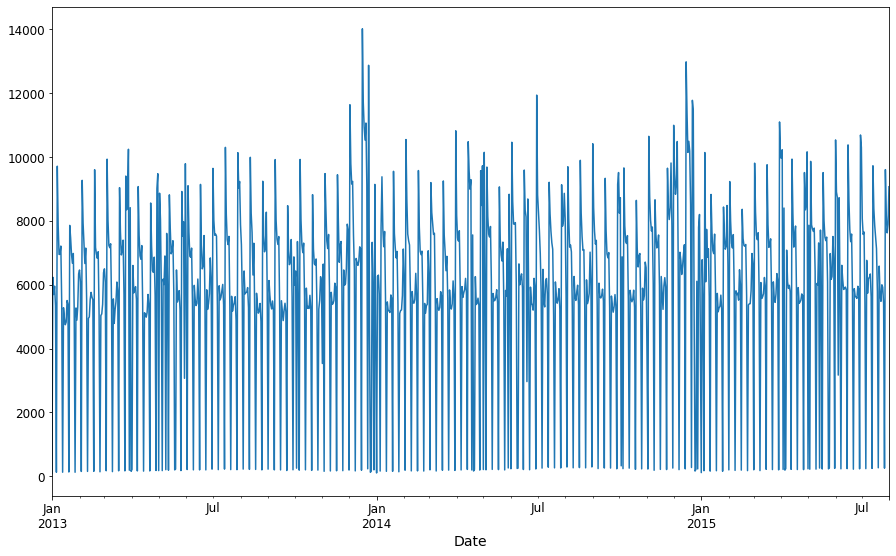

In [5]:
from datetime import datetime

years = ['2013-01-01',
         '2014-01-01', '2015-01-01']
years = [datetime.strptime(x, '%Y-%m-%d') for x in years]

sales=train.groupby('Date')['Sales'].mean()
fig, ax = plt.subplots(figsize=(15, 9))
#ax.set_xticks(quarters, minor=True)
labels =[]
for x in pd.date_range(start='2013-01-01', end='2015-07-31', freq='3M'):
        labels.append(x.strftime("%Y-%m-%d"))
ax.set_xticks(years, minor=False)
ax.xaxis.grid(False, which='major')
sales.plot(ax=ax)
#

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


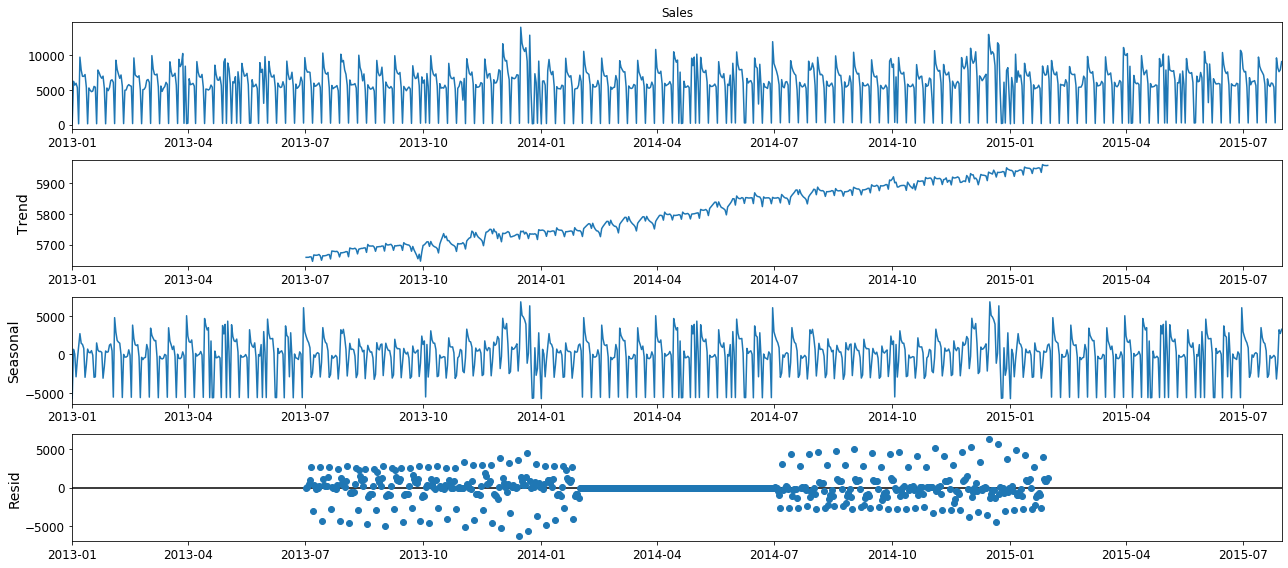

In [6]:

result = seasonal_decompose(sales, model='additive', freq=365)
result.plot()
plt.show()

In [8]:
result.seasonal

Date
2013-01-01   -5744.082364
2013-01-02     665.516824
2013-01-03      55.276212
2013-01-04   -2903.413654
2013-01-05    -692.724136
                 ...     
2015-07-27   -3190.230674
2015-07-28   -1099.358067
2015-07-29    3204.382145
2015-07-30    2725.749417
2015-07-31    3261.682999
Name: seasonal, Length: 942, dtype: float64

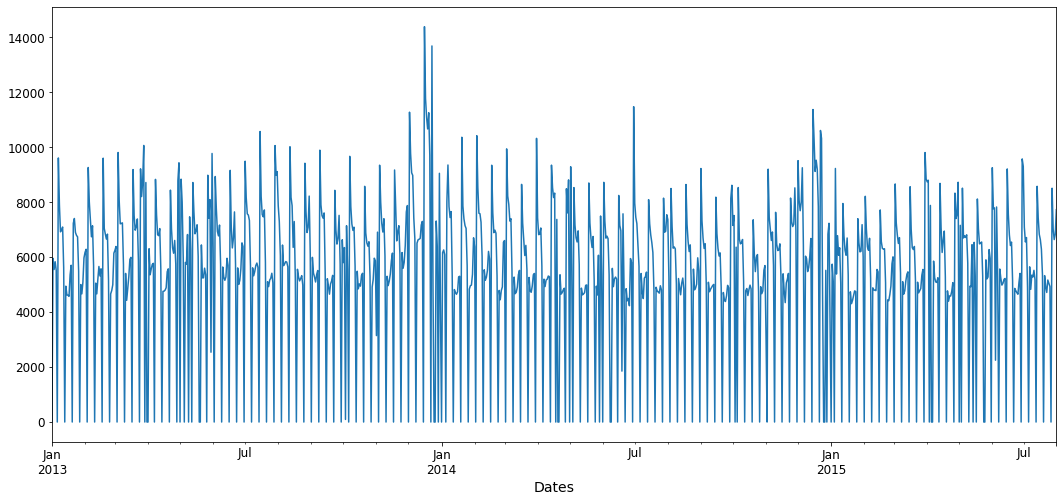

In [12]:

comp_open= train_store.query('CompetitionOpenSinceYear==2014 and CompetitionOpenSinceMonth<5')
comp_open_sales=comp_open.groupby('Dates')['Sales'].mean()
ax=comp_open_sales.plot()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


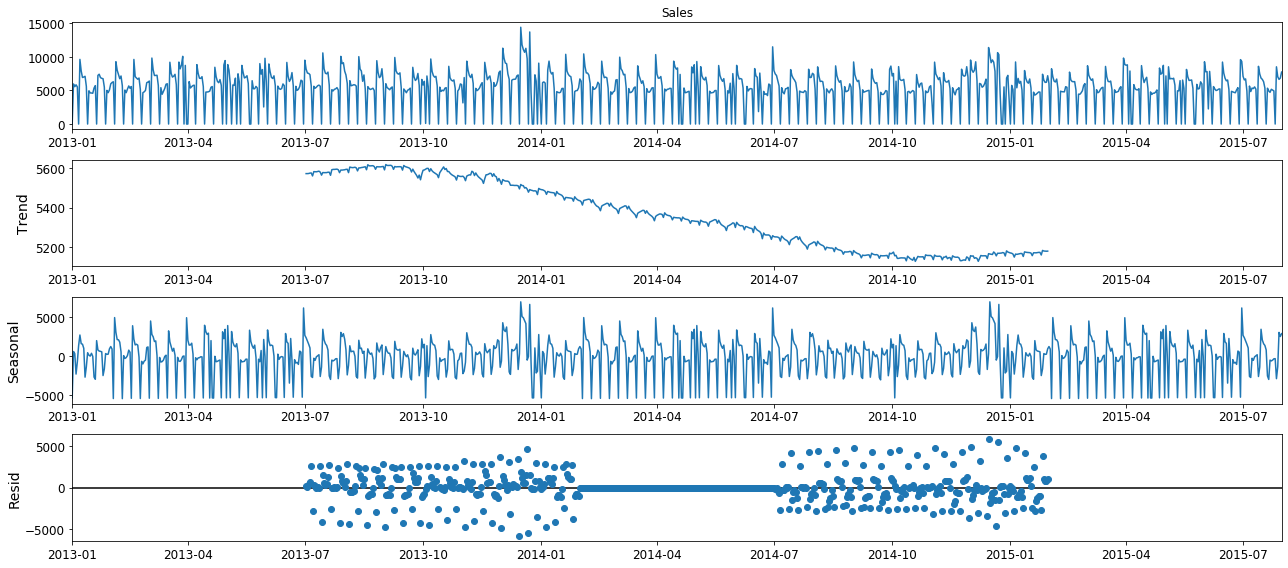

In [13]:
result = seasonal_decompose(comp_open_sales, model='additive', freq=365)
result.plot()
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
corr = train_store.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,square = True, linewidths = .5, ax = ax, cmap = "BrBG")      

plt.show()

In [ ]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'StoreType', 
               
               palette = 'RdPu') 

In [ ]:
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0
axd=train_store.groupby('StoreType')[['Sales','Customers','PromoOpen']].mean()
axd['Sales/Customers']=axd['Sales']/axd['Customers']
axd


In [ ]:
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row='Promo2'
               
               ) 